<a href="https://colab.research.google.com/github/btothey99/DibidibidipLearning/blob/master/deskf2_leeje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from keras.preprocessing.image import array_to_img, img_to_array, load_img


# 기본 경로
base_dir = '/content/drive/MyDrive/Colab Notebooks/deskdata'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련에 사용되는 이미지 경로
train_true_dir = os.path.join(train_dir, 'true')
train_false_dir = os.path.join(train_dir, 'false')
print(train_true_dir)
print(train_false_dir)

# 테스트에 사용되는 이미지 경로
validation_true_dir  = os.path.join(validation_dir, 'true')
validation_false_dir = os.path.join(validation_dir, 'false')
print(validation_true_dir)
print(validation_false_dir)




/content/drive/MyDrive/Colab Notebooks/deskdata/train/true
/content/drive/MyDrive/Colab Notebooks/deskdata/train/false
/content/drive/MyDrive/Colab Notebooks/deskdata/validation/true
/content/drive/MyDrive/Colab Notebooks/deskdata/validation/false


In [18]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [19]:
#모델컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 417 images belonging to 2 classes.
Found 31 images belonging to 2 classes.


In [23]:
#모델 훈련하기 

#이것도 다른 것
history=model.fit_generator(
   train_generator,
    steps_per_epoch=20,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=2,
)



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 9s 457ms/step - loss: 2.2998e-05 - accuracy: 1.0000 - val_loss: 4.9570 - val_accuracy: 0.3226
Epoch 2/50
20/20 [==============================] - 8s 424ms/step - loss: 4.6620e-06 - accuracy: 1.0000 - val_loss: 5.3320 - val_accuracy: 0.4839
Epoch 3/50
20/20 [==============================] - 8s 428ms/step - loss: 2.6282e-06 - accuracy: 1.0000 - val_loss: 5.8933 - val_accuracy: 0.4516
Epoch 4/50
20/20 [==============================] - 8s 419ms/step - loss: 4.6384e-07 - accuracy: 1.0000 - val_loss: 6.4708 - val_accuracy: 0.4516
Epoch 5/50
20/20 [==============================] - 8s 419ms/step - loss: 2.0168e-07 - accuracy: 1.0000 - val_loss: 6.9955 - val_accuracy: 0.3226
Epoch 6/50
20/20 [==============================] - 8s 417ms/step - loss: 1.2650e-07 - accuracy: 1.0000 - val_loss: 7.6120 - val_accuracy: 0.3548
Epoch 7/50
20/20 [==============================] - 8s 415ms/step - loss: 3.9076e-08 - accuracy: 1.0000 - val_loss: 8.3769 -

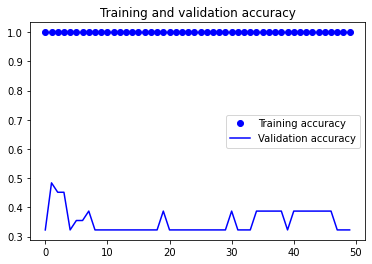

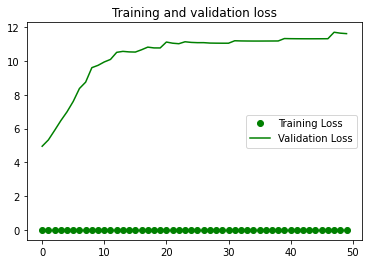

In [24]:
#정확도와 손실파악하기
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#텍스트 이미지 분류하기

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():

  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))

  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")